In [38]:
#imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import os


#Feel free to delete these if you don't want to install them all right away
import xgboost as xgb
from catboost import CatBoostClassifier
#Used sm and smf instead to get these, but can still use them if needed, but sm has better summary() function
from sklearn.linear_model import LinearRegression, LogisticRegression, TweedieRegressor
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import poisson, binom, norm
from scipy.stats import chisquare
import statsmodels.api as sm
import statsmodels.formula.api as smf



from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, make_scorer, roc_auc_score, log_loss, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from collections import Counter
import scipy.stats as st



#Change this to whereever you save your stuff
os.chdir("C:\ASNA_Case_Comp")


<>:36: SyntaxWarning: invalid escape sequence '\A'
<>:36: SyntaxWarning: invalid escape sequence '\A'
C:\Users\graha\AppData\Local\Temp\ipykernel_32188\1835299192.py:36: SyntaxWarning: invalid escape sequence '\A'
  os.chdir("C:\ASNA_Case_Comp")


In [39]:
#Read in dataset
dat = pd.read_excel("Dataset.xlsx")
dat_one_hot = pd.read_csv("cleanData.csv",header=0)

#Add a column for has claim
dat['has_claim'] = dat['claim_id'].apply(lambda x: 1 if x !=0 else 0)
dat_one_hot['has_claim'] = dat_one_hot['claim_id'].apply(lambda x: 1 if x !=0 else 0)

count = 0
for row in dat_one_hot['has_claim']:
    if row > 0:
        count+=1
print(count)
#There is this many total claims out of 10000 students

1819


# Reading in Aidan's data segmented by coverage type

In [40]:
dat_expense = pd.read_csv("CleanByCoverage\CleanByCoverage\expenseClean.csv",header=0)
dat_expense['has_claim'] = dat_expense['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_liability = pd.read_csv("CleanByCoverage\CleanByCoverage\liabilityClean.csv",header=0)
dat_liability['has_claim'] = dat_liability['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_medical = pd.read_csv("CleanByCoverage\CleanByCoverage\medicalClean.csv",header=0)
dat_medical['has_claim'] = dat_medical['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_property = pd.read_csv("CleanByCoverage\CleanByCoverage\propertyClean.csv",header=0)
dat_property['has_claim'] = dat_property['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_expense_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\expense.csv",header=0)
dat_expense_original['has_claim'] = dat_expense_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_liability_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\liability.csv",header=0)
dat_liability_original['has_claim'] = dat_liability_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_medical_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\medical.csv",header=0)
dat_medical_original['has_claim'] = dat_medical_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)

dat_property_original = pd.read_csv("OriginalByCoverage\OriginalByCoverage\property.csv",header=0)
dat_property_original['has_claim'] = dat_property_original['claim_id'].apply(lambda x: 1 if x !=0 else 0)


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:19: SyntaxWarning: invalid escape sequence '\O'
<>:22: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:19: SyntaxWarning: invalid escape sequence '\O'
<>:22: SyntaxWarning: invalid escape sequence '\O'
C:\Users\graha\AppData\Local\Temp\ipykernel_32188\766309216.py:1: SyntaxWarning: invalid escape sequence '\C'
  dat_expense = pd.read_csv("CleanByCoverage\CleanByCoverage\expenseClean.csv",h

# Calculating Claim Frequency

In [41]:
print('Frequency for Additional Expense Coverage')
claim_frequency_expense = list(zip(dat_expense_original['has_claim'], dat_expense_original['risk_tier']))
claim_frequency_expense_counts = Counter(claim_frequency_expense)
for item, count in claim_frequency_expense_counts.items():
    print(f'{item}: {count}')

print('Frequency for Liability Coverage')
claim_frequency_liability = list(zip(dat_liability_original['has_claim'], dat_liability_original['risk_tier']))
claim_frequency_liability_counts = Counter(claim_frequency_liability)
for item, count in claim_frequency_liability_counts.items():
    print(f'{item}: {count}')

print('Frequency for Medical Coverage')
claim_frequency_medical = list(zip(dat_medical_original['has_claim'], dat_medical_original['risk_tier']))
claim_frequency_medical_counts = Counter(claim_frequency_medical)
for item, count in claim_frequency_medical_counts.items():
    print(f'{item}: {count}')

print('Frequency for Property Coverage')
claim_frequency_property = list(zip(dat_property_original['has_claim'], dat_property_original['risk_tier']))
claim_frequency_property_counts = Counter(claim_frequency_property)
for item, count in claim_frequency_property_counts.items():
    print(f'{item}: {count}')

Frequency for Additional Expense Coverage
(0, 2): 2100
(0, 3): 3124
(0, 1): 4264
(1, 2): 111
(1, 1): 255
(1, 3): 162
Frequency for Liability Coverage
(0, 2): 2190
(0, 3): 3251
(0, 1): 4474
(1, 3): 28
(1, 2): 19
(1, 1): 38
Frequency for Medical Coverage
(0, 2): 2154
(0, 3): 3209
(0, 1): 4408
(1, 3): 72
(1, 2): 55
(1, 1): 106
Frequency for Property Coverage
(0, 2): 1999
(0, 3): 3011
(0, 1): 4068
(1, 1): 470
(1, 3): 281
(1, 2): 222


# Modelling Claim Severity

In [42]:
total_loss_expense = dat_expense['amount'].sum()
print(f"Total Expense Loss: {total_loss_expense:,.2f}")

total_claims_expense = dat_expense['has_claim'].sum()
print(f"Total Expense Claims: {total_claims_expense}")

severity_expense = total_loss_expense / total_claims_expense
print(f"Expense Severity (Loss per Claim): {severity_expense:,.2f}")

total_loss_property = dat_property['amount'].sum()
print(f"Total Property Loss: {total_loss_property:,.2f}")

total_claims_property = dat_property['has_claim'].sum()
print(f"Total Property Claims: {total_claims_property}")

severity_property = total_loss_property / total_claims_property
print(f"Property Severity (Loss per Claim): {severity_property:,.2f}")

total_loss_medical = dat_medical['amount'].sum()
print(f"Total Medical Loss: {total_loss_medical:,.2f}")

total_claims_medical = dat_medical['has_claim'].sum()
print(f"Total Medical Claims: {total_claims_medical}")

severity_medical = total_loss_medical / total_claims_medical
print(f"Medical Severity (Loss per Claim): {severity_medical:,.2f}")

total_loss_liability = dat_liability['amount'].sum()
print(f"Total Liability Loss: {total_loss_liability:,.2f}")

total_claims_liability = dat_liability['has_claim'].sum()
print(f"Total Liability Claims: {total_claims_liability}")

severity_liability = total_loss_liability / total_claims_liability
print(f"Liability Severity (Loss per Claim): {severity_liability:,.2f}")




Total Expense Loss: 2,911,317.09
Total Expense Claims: 528
Expense Severity (Loss per Claim): 5,513.86
Total Property Loss: 995,460.03
Total Property Claims: 973
Property Severity (Loss per Claim): 1,023.08
Total Medical Loss: 3,870,552.10
Total Medical Claims: 233
Medical Severity (Loss per Claim): 16,611.81
Total Liability Loss: 737,410.81
Total Liability Claims: 85
Liability Severity (Loss per Claim): 8,675.42


In [43]:
#Distance grouping function
range_vals = [0,5,30]
def distance_grouper(row,distance_range):
    if row == range_vals[0]:
        return 0
    elif row < range_vals[1]:
        return 1
    else: # Greater than range 2 but within range 3 but in this case is just the max range
        return 2

#Apply this to medical dataset
dat_medical['distance_group'] = dat_medical['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))
dat_expense['distance_group'] = dat_expense['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))
dat_liability['distance_group'] = dat_liability['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))
dat_property['distance_group'] = dat_property['distance_to_campus'].apply(lambda x: distance_grouper(x,range_vals))

# Analyzing the Greek (Fraternity;Sorority) Parameter

8035
Frequency (no greek): 0.14859987554449283
Severity (no greek): 3306.9853372647644
Expected Loss (no greek): 491.41760954500666
1965
Frequency (greek): 0.31806615776081426
Severity (greek): 6922.504869298631
Expected Loss (greek): 2201.814525858343


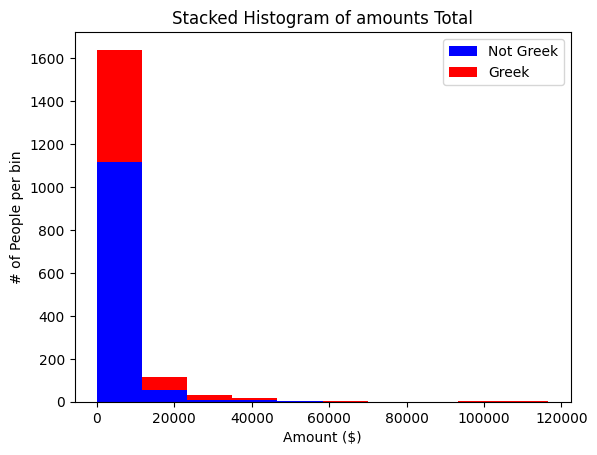

In [ ]:
def analyze_greek(dat):
    dat_greek = dat[dat['greek'] > 0]
    dat_no_greek = dat[dat['greek'] == 0]

    dat_greek_0 = dat_greek[dat_greek['amount']>0]
    dat_no_greek_0 = dat_no_greek[dat_no_greek['amount']>0]

    sigma_no_greek, loc_no_greek, scale_no_greek = st.lognorm.fit(
        dat_no_greek_0['amount'], 
        floc=0
    )
    mu_no_greek = np.log(scale_no_greek)

    # Claim frequency for those WITH sprinklers
    exposures_no_greek = dat_no_greek[['student_id']].drop_duplicates()
    print(len(exposures_no_greek))
    P_claim_no_greek = dat_no_greek['has_claim'].sum() / len(exposures_no_greek)

    # Lognormal severity (mean)
    severity_no_greek = np.exp(mu_no_greek + 0.5 * sigma_no_greek**2)

    # Expected loss
    expected_loss_no_greek = P_claim_no_greek * severity_no_greek

    print("Frequency (no greek):", P_claim_no_greek)
    print("Severity (no greek):", severity_no_greek)
    print("Expected Loss (no greek):", expected_loss_no_greek)

    #Greek
    sigma_greek, loc_greek, scale_greek = st.lognorm.fit(
        dat_greek_0['amount'], 
        floc=0
    )
    mu_greek = np.log(scale_greek)

    #Frequency
    exposures_greek = dat_greek[['student_id']].drop_duplicates()
    print(len(exposures_greek))
    frequency_greek = dat_greek['has_claim'].sum() / len(exposures_greek)

    # Lognormal severity (mean)
    severity_greek = np.exp(mu_greek + 0.5 * sigma_greek**2)

    # Expected loss
    expected_loss_greek = frequency_greek * severity_greek

    print("Frequency (greek):", frequency_greek)
    print("Severity (greek):", severity_greek)
    print("Expected Loss (greek):", expected_loss_greek)

    #Plot for both greek and no greek for claims
    plt.hist(
        [dat_no_greek_0['amount'], dat_greek_0['amount']],
        bins=10,
        stacked=True,
        color=["blue", "red"],
        label=["Not Greek", "Greek"]
    )

    plt.xlabel("Amount ($)")
    plt.ylabel("# of People per bin")
    plt.title(f"Stacked Histogram of amounts Total")
    plt.legend()
    plt.show()


    

analyze_greek(dat_one_hot)



In [66]:
def analyze_group(dat, group_col, N_mc=100000, pml_quantile=0.99):
    groups = dat[group_col].unique()
    results = {}
    
    total_EL = 0
    total_PML = 0
    
    for g in groups:
        dat_g = dat[dat[group_col] == g]
        dat_g_0 = dat_g[dat_g['amount'] > 0]
        
        # Fit lognormal to positive claims
        sigma, loc, scale = st.lognorm.fit(dat_g_0['amount'], floc=0)
        mu = np.log(scale)
        
        # Frequency
        exposures = len(dat_g[['student_id']].drop_duplicates())
        freq = dat_g['has_claim'].sum() / exposures
        
        # Severity (mean of lognormal)
        sev = np.exp(mu + 0.5*sigma**2)
        
        # Expected loss per exposure
        EL = freq * sev
        total_EL += EL * exposures  # total expected loss for the group
        
        # Monte Carlo simulation of total group loss
        total_losses = []
        for _ in range(N_mc):
            # Simulate which exposures have claims
            claims = np.random.binomial(1, freq, size=exposures)
            # Simulate claim amounts for those who have claims
            amounts = np.zeros(exposures)
            if claims.sum() > 0:
                amounts[claims==1] = st.lognorm(s=sigma, scale=scale).rvs(size=claims.sum())
            total_losses.append(amounts.sum())
        
        total_losses = np.array(total_losses)
        PML_total = np.percentile(total_losses, pml_quantile*100)
        PML_per_person = PML_total / exposures
        total_PML += PML_total
        
        results[g] = {
            'freq': freq,
            'sev': sev,
            'EL_per_exposure': EL,
            'total_EL': EL * exposures,
            'PML_per_person': PML_per_person,
            'PML_total': PML_total
        }
    
    # Print totals
    print(f"Total expected loss across all groups: {total_EL:.2f}")
    print(f"Total PML across all groups: {total_PML:.2f}")
    
    return results


In [78]:
nums_greek = analyze_group(dat_one_hot, 'greek')
nums_sprinkle = analyze_group(dat_one_hot, 'sprinklered')
nums_campus = analyze_group(dat_one_hot, 'off_campus')


print(nums_greek)
print(nums_sprinkle)
print(nums_campus)

Total expected loss across all groups: 8275106.04
Total PML across all groups: 9970755.84
Total expected loss across all groups: 8203753.39
Total PML across all groups: 9891950.73
Total expected loss across all groups: 8258956.82
Total PML across all groups: 9938649.30
{0: {'freq': 0.14859987554449283, 'sev': 3306.9853372647644, 'EL_per_exposure': 491.41760954500666, 'total_EL': 3948540.4926941283, 'PML_per_person': 570.569599777721, 'PML_total': 4584526.734213988}, 1: {'freq': 0.31806615776081426, 'sev': 6922.504869298631, 'EL_per_exposure': 2201.814525858343, 'total_EL': 4326565.543311644, 'PML_per_person': 2741.0835143827067, 'PML_total': 5386229.105762019}}
{1: {'freq': 0.1797784720249929, 'sev': 3740.4580696687412, 'EL_per_exposure': 672.4538364386007, 'total_EL': 4735419.916200626, 'PML_per_person': 781.7474605408164, 'PML_total': 5505065.617128429}, 0: {'freq': 0.18695064232589587, 'sev': 6271.850772997913, 'EL_per_exposure': 1172.5265305841262, 'total_EL': 3468333.4774678457, '

In [77]:
def calculate_pml_mc(dat, N_mc=100_000, pml_quantile=0.99):
    """
    Calculate expected loss, PML, and TVaR using Monte Carlo (binomial-lognormal) per exposure.
    
    Parameters:
        dat: DataFrame with 'amount', 'has_claim', 'student_id'
        N_mc: number of Monte Carlo simulations
        pml_quantile: percentile for PML (0-1)
        
    Returns:
        Dictionary with frequency, severity, expected_loss, PML, TVaR
    """
    
    # Filter positive claims for lognormal fitting
    dat_no_0 = dat[dat['amount'] > 0]
    sigma, loc, scale = st.lognorm.fit(dat_no_0['amount'], floc=0)
    mu = np.log(scale)
    
    # Frequency and severity
    exposures = len(dat[['student_id']].drop_duplicates())
    frequency = dat['has_claim'].sum() / exposures
    severity = np.exp(mu + 0.5 * sigma**2)
    expected_loss = frequency * severity

    print("Frequency:", frequency)
    print("Severity:", severity)
    print("Expected Loss:", expected_loss)
    
    # --- Monte Carlo simulation per exposure ---
    total_losses = np.zeros(N_mc)
    
    for i in range(N_mc):
        n_claims = np.random.binomial(exposures, frequency)
        if n_claims > 0:
            severities = np.random.lognormal(mean=mu, sigma=sigma, size=n_claims)
            total_losses[i] = severities.sum()
        else:
            total_losses[i] = 0
    
    # PML and TVaR
    PML = np.percentile(total_losses, pml_quantile*100)
    TVaR = total_losses[total_losses >= PML].mean()
    
    print(f"PML ({int(pml_quantile*100)}%):", PML)
    print(f"TVaR ({int(pml_quantile*100)}%):", TVaR)
    
    return {
        'frequency': frequency,
        'severity': severity,
        'expected_loss': expected_loss,
        'PML': PML,
        'TVaR': TVaR
    }

calculate_pml_mc(dat_one_hot[])

Frequency: 0.1819
Severity: 4490.406100351067
Expected Loss: 816.8048696538591
PML (99%): 9316544.467057139
TVaR (99%): 9531298.501674633


{'frequency': 0.1819,
 'severity': 4490.406100351067,
 'expected_loss': 816.8048696538591,
 'PML': 9316544.467057139,
 'TVaR': 9531298.501674633}

In [ ]:
#Attempting log-normal
# extract severity values (positive only)
vals = dat_expense.loc[dat_expense['amount'] > 0, 'amount']

# take logs for lognormal testing
log_vals = np.log(vals)

# fit lognormal: returns shape (sigma), loc (should be 0), scale (exp(mu))
sigma_expense, loc, scale = st.lognorm.fit(vals, floc=0)
mu_expense = np.log(scale)

print("Estimated μ =", mu_expense)
print("Estimated σ =", sigma_expense)

st.probplot(log_vals, dist="norm", plot=plt)
plt.title("Lognormal QQ Plot (log(amount) vs Normal)")
plt.show()

# histogram
count, bins, _ = plt.hist(vals, bins=50, density=True, alpha=0.5)

# fitted PDF
x = np.linspace(vals.min(), vals.max(), 500)
pdf = st.lognorm.pdf(x, s=sigma_expense, scale=np.exp(mu_expense))

plt.plot(x, pdf, linewidth=2)
plt.xlabel("Claim Amount")
plt.ylabel("Density")
plt.title("Histogram with Fitted Lognormal PDF")
plt.show()


# empirical survival
sorted_vals = np.sort(vals)
ecdf = np.arange(1, len(vals)+1) / len(vals)
surv_emp = 1 - ecdf

# theoretical lognormal survival
surv_theo = st.lognorm.sf(sorted_vals, s=sigma_expense, scale=np.exp(mu_expense))

plt.plot(sorted_vals, np.log(surv_emp), label="Empirical")
plt.plot(sorted_vals, np.log(surv_theo), label="Theoretical", linestyle="--")
plt.legend()
plt.xlabel("x")
plt.ylabel("log Survival")
plt.title("Log-Survival Comparison (Lognormal)")
plt.show()

# KS test using the fitted parameters
ks_stat, p_value = st.kstest(vals, 'lognorm', args=(sigma_expense, 0, np.exp(mu_expense)))

print("KS statistic:", ks_stat)
print("p-value:", p_value)

log_vals = np.log(vals)

result = st.anderson(log_vals, dist='norm')
print(result)

#Now to calculate expected loss, we will condition it on the probabiity of a claim occuring

#Step 1: P(claim)
P_claim_expense = dat_expense['has_claim'].sum() / len(dat_expense['has_claim'])

# Step 2: severity under lognormal
severity = np.exp(mu_expense + 0.5 * sigma_expense**2)

# Step 3: expected loss
expected_loss = P_claim_expense * severity

print("Frequency:", P_claim_expense)
print("Severity:", severity)
print("Expected Loss:", expected_loss)